In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

https://www.bizskinny.com/Finance/Compound-Interest/compound-interest-with-monthly-contributions.php

In [3]:
def composed_return(p, yc, r, y, t, return_acum_roi=False):
  # We assume returns occur once the contribution is added.
  term_roi = r / t
  pc = yc / t

  acum_roi = (1 + term_roi) ** (y * t)
  principal_term = p * acum_roi
  contribution_term = (pc * (acum_roi - 1)) / term_roi
  p_t1 =  principal_term + contribution_term
  if return_acum_roi:
    return round(p_t1, 2), round(acum_roi, 2)
  return round(p_t1, 2)

In [4]:
def earning_by_time(principal, 
                    roi, 
                    years,
                    freq_comp,
                    yearly_contribution=0,
                    on_taxes=False,
                    taxes_per=0):
  MONTHS = 12
  money_t = principal
  earnings_per_year = []
  if (freq_comp is None) or (freq_comp < 1):
    freq_comp = 1
  monthly_contribution = yearly_contribution / MONTHS
  monthly_roi = roi / freq_comp
  c = 0
  for year in range(years):
    #print('----------')
    for month in range(1, MONTHS + 1):
      if c % (12 // freq_comp) == 0:
        #print(c)
        earning = money_t * monthly_roi
        earnings_per_year.append(earning)
        c = 0
      else:
        earning = 0.0
      # Interest computed before contribution (downer benefit)
      money_t += earning + monthly_contribution
      c += 1
    if on_taxes:
      money_t -= sum(earnings_per_year[y * 12:(y + 1) * 12]) * taxes_per
  return money_t, earnings_per_year

In [5]:
principal_amount = 10_000
yearly_contribution = 1200 # 100 * 12
roi = 0.08
years = 30
freq = 1
periodic_contribution = yearly_contribution / freq

composed_return(10_000, 100 * 12, 0.08, 30, 1, True)

(236566.42, 10.06)

In [6]:
total_money, earnings = earning_by_time(principal_amount, 
                                        roi, 
                                        years, 
                                        freq, 
                                        yearly_contribution)

print('Total income, earnings and total input contribution')

total_earnings = sum(earnings)
total_input_contribution = total_money - total_earnings
earning_per_contribution = total_earnings / (total_money - total_earnings)

round(total_money, 2), round(total_earnings, 2), round(total_input_contribution, 2), round(earning_per_contribution, 2)

Total income, earnings and total input contribution


(236566.42, 190566.42, 46000.0, 4.14)

In [7]:
def define_scenario(initial_mounts, rois, years, terms):
  accumulated_money = {}
  for money in initial_mounts:
    for roi in rois:
      for year in years:
        for term in terms:
          total_money, _ = earning_by_time(money, roi, year, term)
          accumulated_money[(money, roi, year, term)] = total_money
  return accumulated_money

In [8]:
results = define_scenario(np.arange(1000, 20000 + 5000, 5000), 
                          (0.08, 0.1, 0.12, 0.13, 0.15),
                          (1, 5, 8, 10, 15, 20), 
                          [1, 6, 12]
                          )

In [9]:
results = define_scenario((1000, 5000), 
                          (0.08, 0.1, 0.12),
                          np.arange(1, 5 + 1), 
                          [12]
                          )

In [10]:
results

{(1000, 0.08, 1, 12): 1082.9995068075111,
 (1000, 0.08, 2, 12): 1172.8879317453118,
 (1000, 0.08, 3, 12): 1270.2370516206538,
 (1000, 0.08, 4, 12): 1375.6661004337943,
 (1000, 0.08, 5, 12): 1489.8457083016106,
 (1000, 0.1, 1, 12): 1104.7130674412972,
 (1000, 0.1, 2, 12): 1220.3909613755604,
 (1000, 0.1, 3, 12): 1348.1818424188289,
 (1000, 0.1, 4, 12): 1489.354098607164,
 (1000, 0.1, 5, 12): 1645.3089347785883,
 (1000, 0.12, 1, 12): 1126.8250301319695,
 (1000, 0.12, 2, 12): 1269.7346485319142,
 (1000, 0.12, 3, 12): 1430.76878359158,
 (1000, 0.12, 4, 12): 1612.226077682464,
 (1000, 0.12, 5, 12): 1816.6966985640897,
 (5000, 0.08, 1, 12): 5414.997534037554,
 (5000, 0.08, 2, 12): 5864.439658726558,
 (5000, 0.08, 3, 12): 6351.185258103268,
 (5000, 0.08, 4, 12): 6878.330502168971,
 (5000, 0.08, 5, 12): 7449.228541508053,
 (5000, 0.1, 1, 12): 5523.565337206486,
 (5000, 0.1, 2, 12): 6101.954806877801,
 (5000, 0.1, 3, 12): 6740.909212094145,
 (5000, 0.1, 4, 12): 7446.770493035822,
 (5000, 0.1, 5

In [11]:
def build_dataframe(data):
  index = pd.MultiIndex.from_tuples(list(data.keys()))
  df = pd.DataFrame(list(data.values()), index=index)
  
  df = df.reset_index()
  df.columns = ['initial_amount', 'roi', 'year', 'term', 'amount']
  return df

In [12]:
df_results = build_dataframe(results)
df_results

,initial_amount,roi,year,term,amount
0,1000,0.08,1,12,1082.999507
1,1000,0.08,2,12,1172.887932
2,1000,0.08,3,12,1270.237052
3,1000,0.08,4,12,1375.666100
4,1000,0.08,5,12,1489.845708
5,1000,0.10,1,12,1104.713067
6,1000,0.10,2,12,1220.390961
7,1000,0.10,3,12,1348.181842
8,1000,0.10,4,12,1489.354099
9,1000,0.10,5,12,1645.308935


In [13]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

In [25]:
def plot_temporal_serie(df, x_name, y_name, param, on_agg_roi=True):
  df_temp = df.copy()
  sns.scatterplot(data=df_temp, x=x_name, y=y_name, hue=param)

In [26]:
df_results

,initial_amount,roi,year,term,amount
0,1000,0.08,1,12,1082.999507
1,1000,0.08,2,12,1172.887932
2,1000,0.08,3,12,1270.237052
3,1000,0.08,4,12,1375.666100
4,1000,0.08,5,12,1489.845708
5,1000,0.10,1,12,1104.713067
6,1000,0.10,2,12,1220.390961
7,1000,0.10,3,12,1348.181842
8,1000,0.10,4,12,1489.354099
9,1000,0.10,5,12,1645.308935


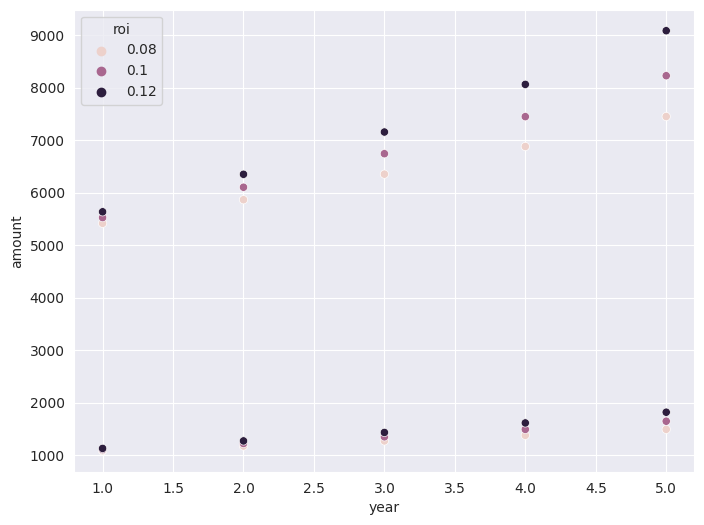

In [28]:
plt.figure(figsize=(8, 6))
plot_temporal_serie(df_results, 'year', 'amount', 'roi')